In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("student.csv")

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
72+72+74/3

168.66666666666666

In [6]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
data.shape

(1000, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data['gender'].dtypes

dtype('O')

In [10]:
data['gender'].dtypes=='O'

True

In [11]:
data['writing score'].dtypes=='O'

False

In [12]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
cat_col=[fea for fea in data.columns if data[fea].dtype == 'O']

In [14]:
cat_col

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [15]:
num_col=[fea for fea in data.columns if data[fea].dtype != 'O']

In [16]:
num_col

['math score', 'reading score', 'writing score']

In [17]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [18]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [19]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

### missing value

In [20]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [22]:
data.isnull().sum().sum()

0

In [23]:
data.duplicated().sum()

0

In [24]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [25]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [26]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [28]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [29]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [30]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot: xlabel='math score', ylabel='Density'>

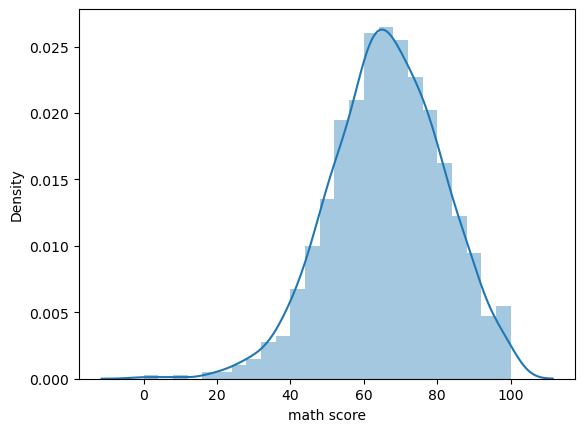

In [31]:
sns.distplot(data['math score'])

In [32]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [33]:
data['Avarge']=(data['math score']+data['reading score']+data['writing score'])/3
data['Avarge']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Avarge, Length: 1000, dtype: float64

In [34]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [35]:
data.groupby('gender').mean()

,math score,reading score,writing score,Avarge
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [36]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [37]:
#question: you have to find out no of student whoever is having less than 30 marks math

In [38]:
data[data["math score"] < 30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
Avarge                         14
dtype: int64

In [39]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Avarge'],
      dtype='object')

In [40]:
data_num=data[num_col]

In [41]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [42]:
from scipy.stats import normaltest

In [43]:
normaltest(data_num['reading score'])[1]*100

0.3853758403576582

<AxesSubplot: xlabel='reading score', ylabel='Density'>

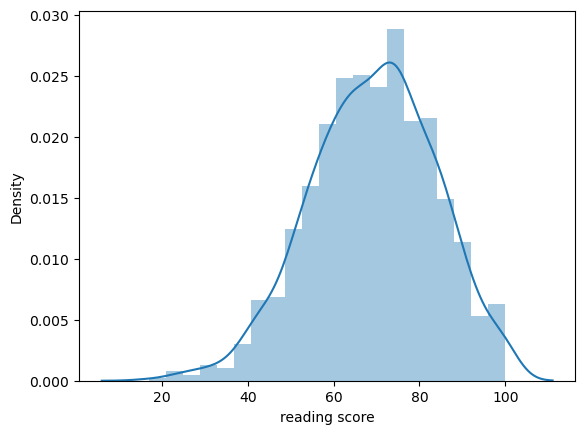

In [44]:
sns.distplot(data_num['reading score'])

<AxesSubplot: xlabel='reading score', ylabel='Density'>

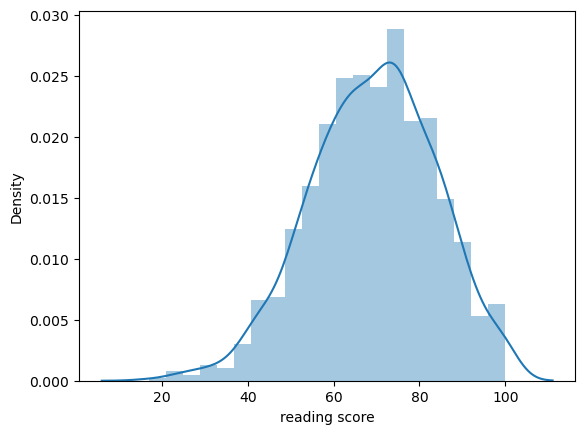

In [45]:
sns.distplot(data_num['reading score'])

<AxesSubplot: >

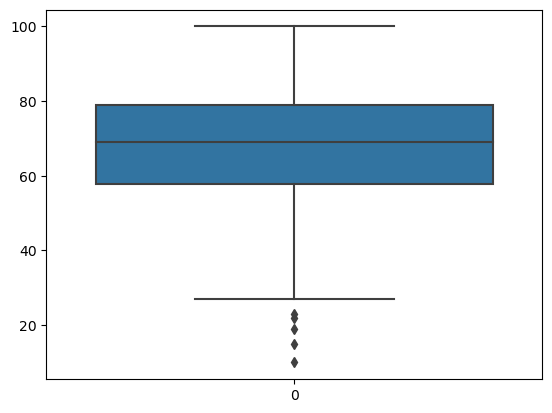

In [46]:
#outlier
sns.boxplot(data=data['writing score'])

<AxesSubplot: >

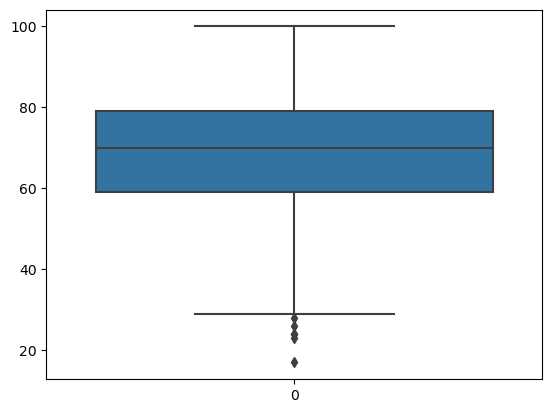

In [47]:
sns.boxplot(data=data['reading score'])

In [48]:
q1=data['math score'].quantile(0.25)
q1

57.0

In [49]:
q3=data['math score'].quantile(0.75)
q3

77.0

In [50]:
IQR=q3-q1

In [51]:
upper_limit=q3+(1.5*IQR)
upper_limit

107.0

In [52]:
lower_limit=q1-(1.5*IQR)
lower_limit

27.0

In [53]:
data_outlier=data[data['math score']<lower_limit]

In [54]:
data_num.drop(data_outlier.index)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [55]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [56]:
data[data['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge


In [57]:
data['math score'].quantile(1.00)

100.0

In [58]:
data['math score'].min()

0

In [59]:
data['math score'].max()

100

In [60]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

In [61]:
def get_iqr(df, column_name, q1_range, q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5 * IQR
    lower_fence = q1 - 1.5 * IQR
    return IQR, upper_fence, lower_fence

In [62]:
data_num.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [63]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    iqr=q2-q1
    up_limit=q2
    +(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit

In [64]:
outlier_threshold(data,'math score')

(27.0, 77.0)

In [65]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        low_limit,upper_limit=outlier_threshold(data_num,variable)
        data.loc[data[variable]<low_limit,variable]=low_limit
        data.loc[data[variable]>upper_limit,variable]=upper_limit

In [66]:
replace_with_threshold(data_num,data_num.columns)

In [67]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333
